In [58]:
# This is a project to display a map illustrating the countries with the highest CO2 emissions (in metric tons) per capita in 2021.
# There are also bar charts depicting the biggest and smallest emitters per capita and the sources of that CO2.

# Sources:
# https://www.kaggle.com/code/ikiulian/simple-global-countries-visualization
# https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022?resource=download&select=GCB2022v27_percapita_flat.csv
# https://pythontic.com/pandas/dataframe-plotting/bar%20chart

In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd
import matplotlib.pyplot as plt

# The dataset we need:
df_global = pd.read_csv('/content/GCB2022v27_percapita_flat.csv')
df_global.dataframeName = 'GCB2022v27_percapita_flat.csv'

df_global.rename(columns={'ISO 3166-1 alpha-3':'Country Code'}, inplace=True)

df_global = df_global[['Country', 'Country Code', 'Year', 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']]
df_global.head()

,Country,Country Code,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
0,Afghanistan,AFG,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# This is a Geopandas dataset corresponding to a world mpa with country outlines.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

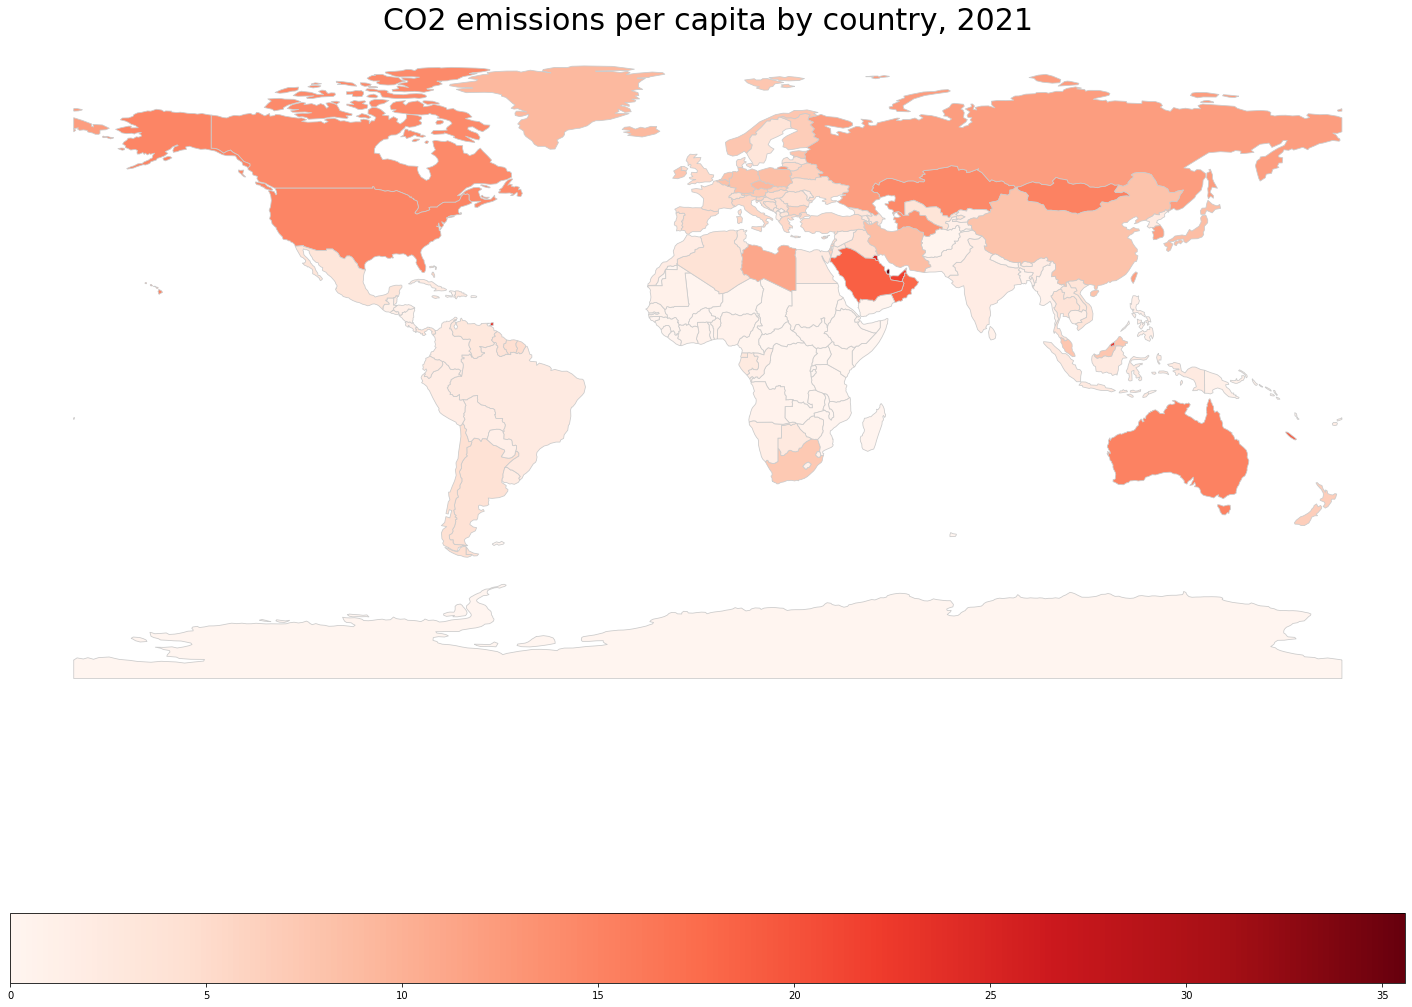

In [61]:
# For the purposes of this project, we're only interested in data for the year 2021.
df_global_2021 = df_global[df_global['Year'] == 2021]

# Let's merge the world map data with the emissions data, specifically the country codes and total emissions.
mapped = world.merge(df_global_2021[['Country Code', 'Total']], how='left', left_on='iso_a3', right_on='Country Code')
mapped = mapped.fillna(0)

to_be_mapped = 'Total'
vmin, vmax = 0,df_global_2021['Total'].max()
fig, ax = plt.subplots(1, figsize=(25,25))

# The more red a country, the higher its emissions per capita.
mapped.plot(column=to_be_mapped, cmap='Reds', linewidth=0.8, ax=ax, edgecolors='0.8')
ax.set_title('CO2 emissions per capita by country, 2021', fontdict={'fontsize':30})
ax.set_axis_off()

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar = fig.colorbar(sm, orientation='horizontal')

In [62]:
# Let's find the biggest and smallest emitters (per capita).

# Biggest emitters per capita (>20 metric tons):
df_most_co2_2021 = df_global_2021[df_global_2021.apply(lambda row: row['Total'] > 20, axis=1)]
df_most_co2_2021.sort_values('Total', ascending=False)

,Country,Country Code,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
45151,Qatar,QAT,2021,35.587357,0.000000,3.226295,31.072901,0.584650,0.703512,NaN
4351,Bahrain,BHR,2021,26.663720,0.000000,2.426313,23.642933,0.420088,0.174386,NaN
29375,Kuwait,KWT,2021,24.972098,0.000000,12.643539,11.721402,0.287619,0.319538,NaN
57119,Trinidad and Tobago,TTO,2021,23.677599,0.000000,2.016713,21.305957,0.172285,0.182644,NaN
8159,Brunei Darussalam,BRN,2021,23.532003,0.865973,8.708841,13.046933,0.000000,0.910255,NaN
59295,United Arab Emirates,ARE,2021,21.792151,0.714923,6.389958,13.901180,0.611617,0.174473,NaN


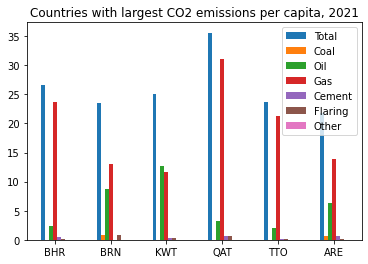

In [63]:
# Let's display the different sources of CO2 in each of these countries (coal, oil, gas, etc.).
# We make a dictionary:
data = {"Total": df_most_co2_2021['Total'].values,
        "Coal": df_most_co2_2021['Coal'].values,
        "Oil": df_most_co2_2021['Oil'].values,
        "Gas": df_most_co2_2021['Gas'].values,
        "Cement": df_most_co2_2021['Cement'].values,
        "Flaring": df_most_co2_2021['Flaring'].values,
        "Other": df_most_co2_2021['Other'].values,
        };
index = df_most_co2_2021['Country Code'].values;
dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart:
dataFrame.plot.bar(rot=0, title="Countries with largest CO2 emissions per capita, 2021");

In [64]:
# Smallest emitters per capita (<0.1 metric tons):
df_least_co2_2021 = df_global_2021[df_global_2021.apply(lambda row: row['Total'] < 0.1 and row['Total'] > 0, axis=1)]
df_least_co2_2021.sort_values('Total')

,Country,Country Code,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
14687,Democratic Republic of the Congo,COD,2021,0.027183,0.000000,0.022479,0.0,0.004704,0.0,NaN
51951,Somalia,SOM,2021,0.035766,0.000000,0.035766,0.0,NaN,0.0,NaN
10063,Central African Republic,CAF,2021,0.041651,0.000000,0.041651,0.0,0.000000,0.0,NaN
8975,Burundi,BDI,2021,0.055206,0.003981,0.048910,0.0,0.002315,0.0,NaN
33727,Malawi,MWI,2021,0.078040,0.011401,0.061905,0.0,0.004734,0.0,NaN


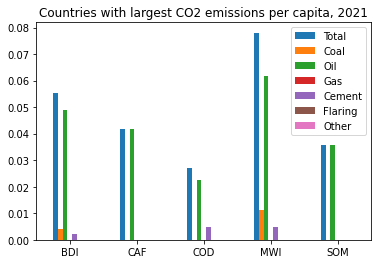

In [65]:
# Let's display the different sources of CO2 in each of these countries (coal, oil, gas, etc.).
# We make a dictionary:
data = {"Total": df_least_co2_2021['Total'].values,
        "Coal": df_least_co2_2021['Coal'].values,
        "Oil": df_least_co2_2021['Oil'].values,
        "Gas": df_least_co2_2021['Gas'].values,
        "Cement": df_least_co2_2021['Cement'].values,
        "Flaring": df_least_co2_2021['Flaring'].values,
        "Other": df_least_co2_2021['Other'].values,
        };
index = df_least_co2_2021['Country Code'].values;
dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart:
dataFrame.plot.bar(rot=0, title="Countries with smallest CO2 emissions per capita, 2021");